# The Spanish League: Exploratory Data Analysis
In this notebook, we will analyze the data about the Spanish League for the seasons from 1970-71 until 2017-18 (although the data for the last season is not yet complete, because this season is still in progress).
## Import the libraries:

In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

## Read the input file:

In [7]:
matches = pd.read_csv("FMEL_Dataset.csv")

## Check the head of the dataframe:

In [8]:
print(matches.head())

   id   season  division  round      localTeam         visitorTeam  \
0   1  1970-71         1      1  Athletic Club           Barcelona   
1   2  1970-71         1      1     Las Palmas  Atletico de Madrid   
2   3  1970-71         1      1    Real Madrid            Valencia   
3   4  1970-71         1      1  Celta de Vigo   Sporting de Gijon   
4   5  1970-71         1      1          Elche             Granada   

   localGoals  visitorGoals        date  timestamp  
0           1             1  12/09/1970   21938400  
1           1             1  12/09/1970   21938400  
2           2             0  12/09/1970   21938400  
3           2             0  13/09/1970   22024800  
4           1             1  13/09/1970   22024800  


## Check for missing values:

In [9]:
matches.isnull().sum()

id              0
season          0
division        0
round           0
localTeam       0
visitorTeam     0
localGoals      0
visitorGoals    0
date            0
timestamp       0
dtype: int64

## Check the summary of the dataframe:

In [10]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36652 entries, 0 to 36651
Data columns (total 10 columns):
id              36652 non-null int64
season          36652 non-null object
division        36652 non-null int64
round           36652 non-null int64
localTeam       36652 non-null object
visitorTeam     36652 non-null object
localGoals      36652 non-null int64
visitorGoals    36652 non-null int64
date            36652 non-null object
timestamp       36652 non-null int64
dtypes: int64(6), object(4)
memory usage: 2.8+ MB


We see that we have 36652 observations and 10 features. Next we will focus on division 1 only.

In [11]:
division1 = matches[matches['division'] == 1]
division1.drop('division', axis = 1, inplace = True)
division1.head()

C:\Anacoda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,season,round,localTeam,visitorTeam,localGoals,visitorGoals,date,timestamp
0,1,1970-71,1,Athletic Club,Barcelona,1,1,12/09/1970,21938400
1,2,1970-71,1,Las Palmas,Atletico de Madrid,1,1,12/09/1970,21938400
2,3,1970-71,1,Real Madrid,Valencia,2,0,12/09/1970,21938400
3,4,1970-71,1,Celta de Vigo,Sporting de Gijon,2,0,13/09/1970,22024800
4,5,1970-71,1,Elche,Granada,1,1,13/09/1970,22024800


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Compare the total number of local goals vs. total number of visitor goals in each season:

In [13]:
local_visitor_goals = division1.groupby('season')[['localGoals', 'visitorGoals']].sum()
local_visitor_goals.reset_index(inplace = True)
local_visitor_goals.head()

,season,localGoals,visitorGoals
0,1970-71,372,171
1,1971-72,471,204
2,1972-73,454,202
3,1973-74,499,211
4,1974-75,530,215


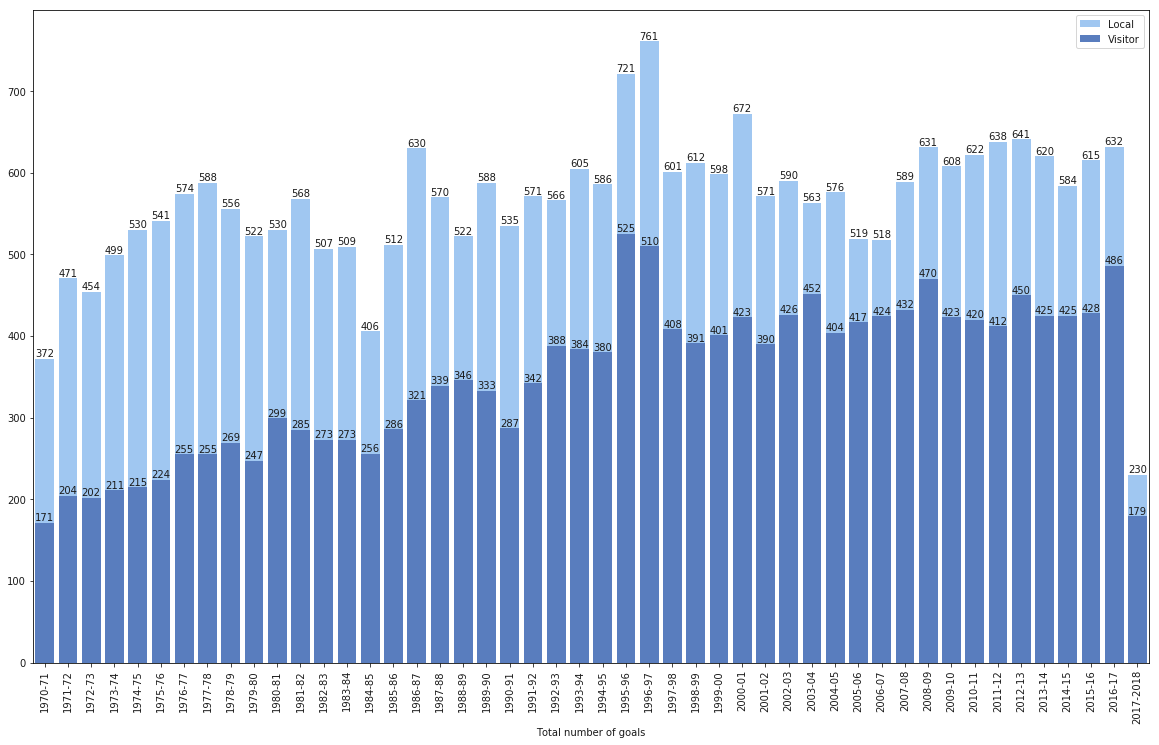

In [14]:
plt.figure(figsize=(20, 12))
plt.xticks(rotation='vertical')
sns.set_color_codes("pastel")
g1 = sns.barplot(x = 'season', y = 'localGoals', data = local_visitor_goals, label = "Local", color = 'b')
sns.set_color_codes("muted")
g2 = sns.barplot(x = 'season', y = 'visitorGoals', data = local_visitor_goals, label = "Visitor", color = 'b')

for rect in g1.patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')

    
plt.ylabel("")
plt.xlabel("Total number of goals")
plt.legend()

It is evident that the total number of goals that were scored by the local teams is greater than the total number of goals scored by the visitor teams for every single season. This is to be expected, since local teams play on their own stadium and between their own supporters, which play an important psychological role. 

## The total number of local goals for each team in all seasons:

In [15]:
local_team = division1.groupby('localTeam')['localGoals'].sum()
local_team = pd.DataFrame(local_team)
local_team.head()

,localGoals
localTeam,
AD Almeria,50
Alaves,167
Albacete,194
Almeria,139
Athletic Club,1505


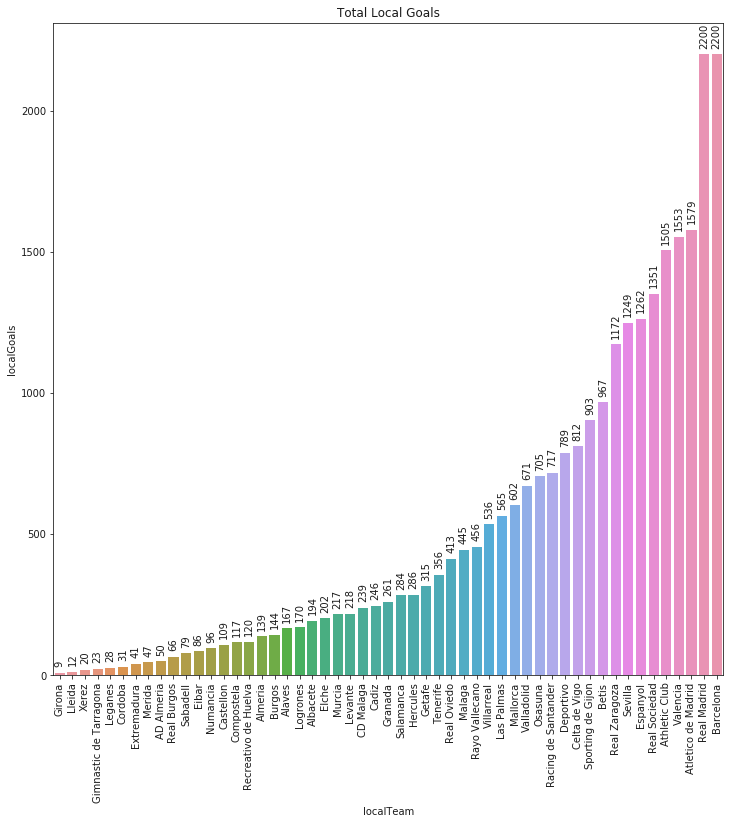

In [16]:
plt.figure(figsize=(12, 12))
plt.xticks(rotation='vertical')
g = sns.barplot(x = 'localTeam', y = 'localGoals', data = local_team.sort_values('localGoals').reset_index())
plt.title("Total Local Goals")
for rect in g.patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height + 20, '%d' % int(height), ha='center', va='bottom', rotation = 'vertical')

We see that Barcelona and Real Madrid both have scored the same maximum number of local goals in all seasons, which is 2200, followed by Altlico de Madrid with 1579.

## The total number of visitor goals for each team in all seasons:

In [17]:
visitor_team = division1.groupby('visitorTeam')['visitorGoals'].sum()
visitor_team = pd.DataFrame(visitor_team)
visitor_team.head()

,visitorGoals
visitorTeam,
AD Almeria,21
Alaves,135
Albacete,126
Almeria,105
Athletic Club,856


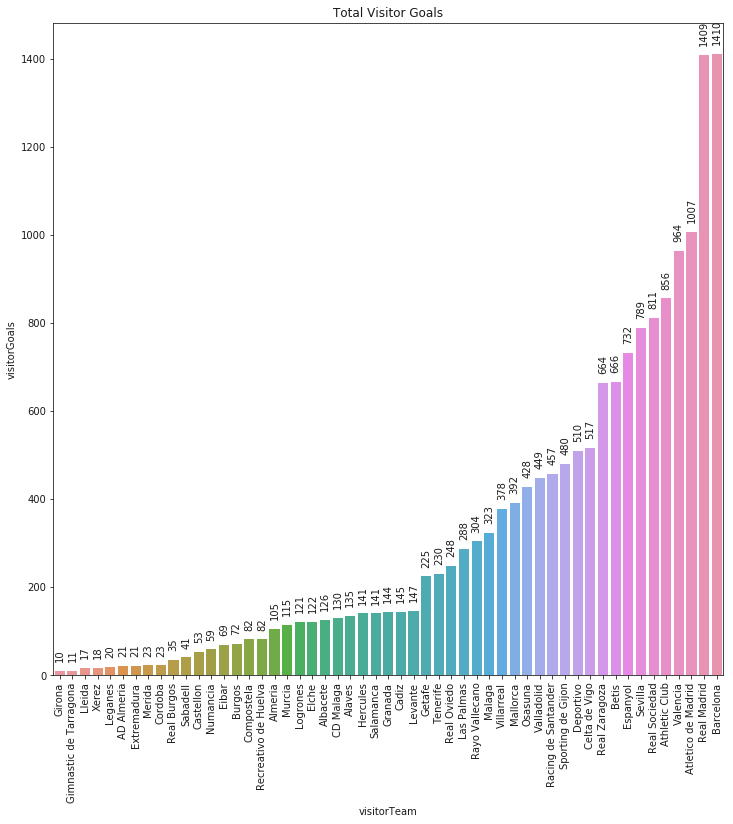

In [18]:
plt.figure(figsize=(12, 12))
plt.xticks(rotation='vertical')
g = sns.barplot(x = 'visitorTeam', y = 'visitorGoals', data = visitor_team.sort_values('visitorGoals').reset_index())
plt.title("Total Visitor Goals")
for rect in g.patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height + 20, '%d' % int(height), ha='center', va='bottom', rotation = 'vertical')

Barcelona beats Real Madrid by one goal in the total number of visitor goals in all seasons for this data. It is no coincidence we have comparable results for these two teams, since they (Barcelona and Real Madrid) are the strongest two teams in the Spanish League division 1, and they compete on the title most of the seasons (as we will see next).

In [19]:
seasons = list(division1['season'].unique())

In [20]:
teams = list(division1['localTeam'].unique())

## Calculate the points for each match:
Next we will extract more information from the data provided using the local and visitor goals for each match. An important point in this regard is that the 3-1-0 point system was adopted in spain in 1995. Before that it was 2-1-0 (for win-draw-loss). Another important point is that when two teams have the same max number of total points after the final game, the tie is broken by comparing the total goals of each team in the matches where they played agaisnt each others. The following is just an implemenation of these two simple rules to calculate the total points of each team in all seasons.  

In [21]:
season_local_visitor = division1.groupby(['season', 'localTeam', 'visitorTeam'])[['localGoals', 'visitorGoals']].sum()
season_local_visitor.head()

localGoals  visitorGoals
season  localTeam     visitorTeam                                 
1970-71 Athletic Club Atletico de Madrid           1             0
                      Barcelona                    1             1
                      CD Malaga                    2             1
                      Celta de Vigo                2             0
                      Elche                        2             0

In [22]:
season_local_visitor['difference'] = season_local_visitor['localGoals'] - season_local_visitor['visitorGoals']
season_local_visitor.head()

localGoals  visitorGoals  difference
season  localTeam     visitorTeam                                             
1970-71 Athletic Club Atletico de Madrid           1             0           1
                      Barcelona                    1             1           0
                      CD Malaga                    2             1           1
                      Celta de Vigo                2             0           2
                      Elche                        2             0           2

In [23]:
# 1 for win, -1 for loss, 0 for draw (or tie)
season_local_visitor['localWin'] = season_local_visitor['difference'].apply(lambda x: 1 if x > 0 else (0 if x == 0 else -1))
season_local_visitor.reset_index(inplace = True)
season_local_visitor.head()

,season,localTeam,visitorTeam,localGoals,visitorGoals,difference,localWin
0,1970-71,Athletic Club,Atletico de Madrid,1,0,1,1
1,1970-71,Athletic Club,Barcelona,1,1,0,0
2,1970-71,Athletic Club,CD Malaga,2,1,1,1
3,1970-71,Athletic Club,Celta de Vigo,2,0,2,1
4,1970-71,Athletic Club,Elche,2,0,2,1


In [24]:
seasonBefore1995 = seasons[0:list(season_local_visitor['season'].unique()).index('1994-95')+1]
seasonBefore1995

['1970-71',
 '1971-72',
 '1972-73',
 '1973-74',
 '1974-75',
 '1975-76',
 '1976-77',
 '1977-78',
 '1978-79',
 '1979-80',
 '1980-81',
 '1981-82',
 '1982-83',
 '1983-84',
 '1984-85',
 '1985-86',
 '1986-87',
 '1987-88',
 '1988-89',
 '1989-90',
 '1990-91',
 '1991-92',
 '1992-93',
 '1993-94',
 '1994-95']

In [25]:
season_local_visitor['localPoints'] = season_local_visitor.apply(lambda x: 2 if (x['localWin'] == 1 and x['season'] in seasonBefore1995) 
                                                                 else (3 if (x['localWin'] == 1 and x['season'] not in seasonBefore1995)
                                                                 else (1 if x['localWin'] == 0 else 0)), axis = 1)
#season_local_visitor
season_local_visitor['visitorPoints'] = season_local_visitor.apply(lambda x: 2 if (x['localPoints'] == 0 and x['season'] in seasonBefore1995)
                                                                   else (3 if (x['localPoints'] == 0 and x['season'] not in seasonBefore1995)
                                                                   else (1 if x['localPoints'] == 1 else 0)), axis = 1)
season_local_visitor.head()
# season_local_visitor.reset_index(inplace = True)
# season_local_visitor.head(15)

,season,localTeam,visitorTeam,localGoals,visitorGoals,difference,localWin,localPoints,visitorPoints
0,1970-71,Athletic Club,Atletico de Madrid,1,0,1,1,2,0
1,1970-71,Athletic Club,Barcelona,1,1,0,0,1,1
2,1970-71,Athletic Club,CD Malaga,2,1,1,1,2,0
3,1970-71,Athletic Club,Celta de Vigo,2,0,2,1,2,0
4,1970-71,Athletic Club,Elche,2,0,2,1,2,0


In [26]:
total_localPoints = season_local_visitor.groupby(['season', 'localTeam'])[['localPoints']].sum()
total_localPoints.head()

localPoints
season  localTeam                      
1970-71 Athletic Club                25
        Atletico de Madrid           28
        Barcelona                    23
        CD Malaga                    18
        Celta de Vigo                27

In [27]:
total_visitorPoints = season_local_visitor.groupby(['season', 'visitorTeam'])[['visitorPoints']].sum()
total_visitorPoints.head()

visitorPoints
season  visitorTeam                      
1970-71 Athletic Club                  10
        Atletico de Madrid             14
        Barcelona                      20
        CD Malaga                      10
        Celta de Vigo                   8

In [28]:
total_points = pd.concat([total_localPoints, total_visitorPoints], axis = 1)
total_points['totalPoints'] = total_points['localPoints'] + total_points['visitorPoints']
total_points.head(21)

localPoints  visitorPoints  totalPoints
season  localTeam                                                  
1970-71 Athletic Club                25             10           35
        Atletico de Madrid           28             14           42
        Barcelona                    23             20           43
        CD Malaga                    18             10           28
        Celta de Vigo                27              8           35
        Elche                        14              4           18
        Espanyol                     18              7           25
        Granada                      23              5           28
        Las Palmas                   17              3           20
        Real Madrid                  23             18           41
        Real Sociedad                21              8           29
        Real Zaragoza                13              2           15
        Sabadell                     20              1           21
        Sevilla                      25              7           32
        Sporting de Gijon            20              5           25
        Valencia                     26             17           43
1971-72 Athletic Club                23             11           34
        Atletico de Madrid           23             16           39
        Barcelona                    25             18           43
        Betis                        24              6           30
        Burgos                       24              5           29

We see that Barcelona and Valencia both had the same total points in season 1970-71. In cases such as this we need to refer to the two matches these two teams played against each others that season (each team plays twice with each other team: once as a home team and once as a visitor or an away team) and compare their total goals in these matches to break the tie (there are further rules if a tie remains, but we only use the first rule to break a tie, since it is less likely that two teams accumulate the same max total points, AND have the same number of total goals in their matches against each others). 

In [29]:
max_df = pd.DataFrame(columns = ['Season', 'Max Total Points', 'Max Total Points Team'])
for season in seasons:
    seasonSummary = pd.DataFrame(total_points.loc[season])
    max_points = seasonSummary['totalPoints'].max()
    max_points_team = seasonSummary['totalPoints'].idxmax()
    max_points_ALL_teams = list(seasonSummary.loc[seasonSummary['totalPoints'] == max_points].index)#This returns a list of the teams that have the max points
    if len(max_points_ALL_teams) == 2:#This conditional statement is to break a tie between two teams that have the same max number of points
        #print(season, '\n', max_points_ALL_teams[0: 2])
        first_match = pd.DataFrame(season_local_visitor[(season_local_visitor['season'] == season) & 
                                   (season_local_visitor['localTeam'] == max_points_ALL_teams[0]) & 
                                   (season_local_visitor['visitorTeam'] == max_points_ALL_teams[1])
                                  ])
        second_match = pd.DataFrame(season_local_visitor[(season_local_visitor['season'] == season) & 
                                   (season_local_visitor['localTeam'] == max_points_ALL_teams[1]) & 
                                   (season_local_visitor['visitorTeam'] == max_points_ALL_teams[0])
                                  ])
        
        first_second_matches = pd.concat([first_match, second_match])
        if (first_second_matches[first_second_matches['localTeam'] == max_points_ALL_teams[0]]['difference'].item()>
             first_second_matches[first_second_matches['localTeam'] == max_points_ALL_teams[1]]['difference'].item()):
            max_points_team = max_points_ALL_teams[0]
        else:
            max_points_team = max_points_ALL_teams[1]
        
    max_df = max_df.append({'Season': season,
                            'Max Total Points': max_points,
                            'Max Total Points Team': max_points_team,
                           }, 
                            ignore_index=True)

In [30]:
max_df

,Season,Max Total Points,Max Total Points Team
0,1970-71,43,Valencia
1,1971-72,47,Real Madrid
2,1972-73,48,Atletico de Madrid
3,1973-74,50,Barcelona
4,1974-75,50,Real Madrid
5,1975-76,48,Real Madrid
6,1976-77,46,Atletico de Madrid
7,1977-78,47,Real Madrid
8,1978-79,47,Real Madrid
9,1979-80,53,Real Madrid


## The champions of each season and their total points:
Now we have all the details to find the champions of the la liga division 1. 

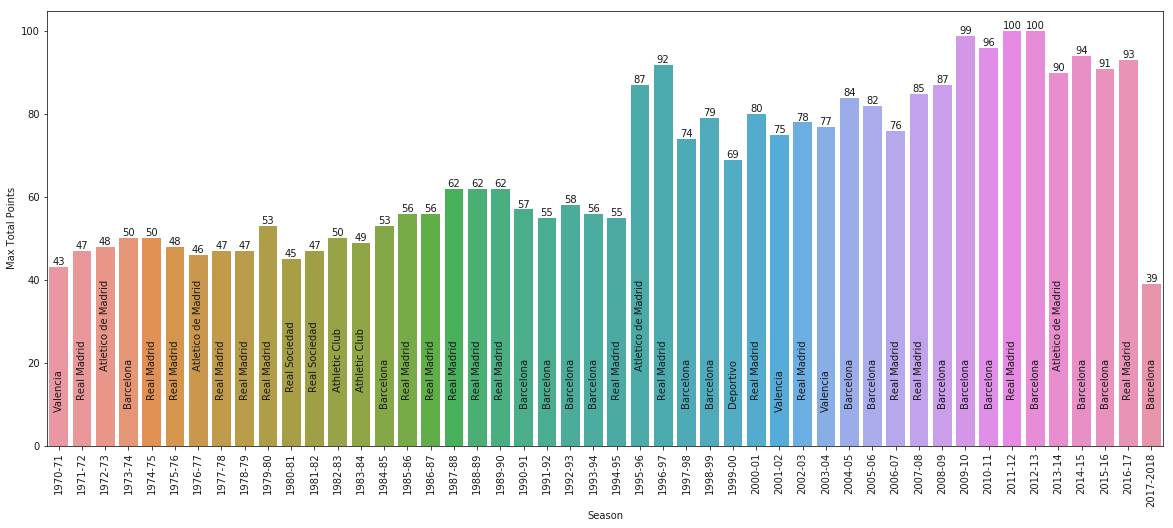

In [31]:
plt.figure(figsize = (20, 8))
plt.xticks(rotation = 'vertical')
g = sns.barplot(x = 'Season', y = 'Max Total Points', data = max_df)
for i, rect in enumerate(g.patches):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
    plt.text(rect.get_x() + rect.get_width()/2.0, len(max_df.loc[i, 'Max Total Points Team']), 
             max_df.loc[i, 'Max Total Points Team'], ha='center', va='bottom', rotation = 'vertical')

# Total number of winning the champion title:

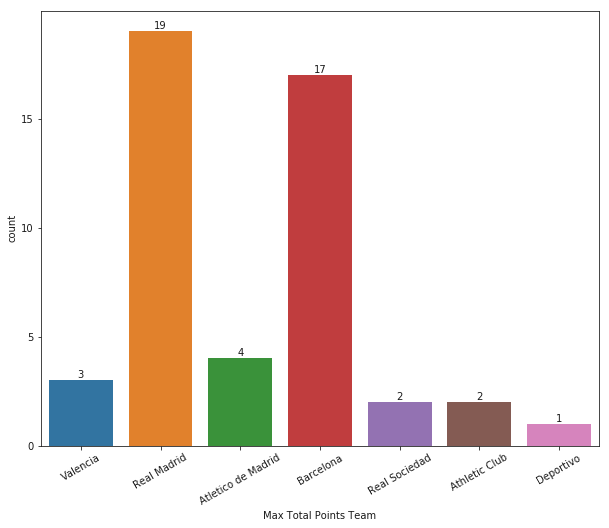

In [32]:
plt.figure(figsize = (10, 8))
plt.xticks(rotation = 30)
plt.yticks([0, 5, 10, 15, 20])
g = sns.countplot(x = 'Max Total Points Team', data = max_df)
for rect in g.patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')

As we said earlier, Real Madrid and Barcelona compete on the title most of the seasons. Since 1970-71 Real Madrid has won 19 times, while Barcelona has won the title 17 times (including this unfinished season, but if you watch the spanish La Liga, Barcelona looks in its way to win its next champion's title in La Liga).

If you have any comment or suggestion about this work, I will be happy to hear it. Thanks for reading. 